In [1]:
from federated_learning.utils import SHAPUtil
from federated_learning import Configuration
from federated_learning import LocalEnvironment

In [2]:
config = Configuration()
data = config.DATASET(config)
sim_env = LocalEnvironment(config, data)
sim_env.poison_clients()

MNIST training data loaded.
MNIST test data loaded.
Create Clients
1 clients poisoned
Label Flipping from 5 to 4


In [3]:
sim_env.clients[0].test()
for epoch in range(1, config.N_EPOCHS + 1):
    sim_env.clients[0].train(epoch)
    sim_env.clients[0].test()


Test set: Average loss: 0.0023, Accuracy: 1009/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.338429
Train Epoch: 1 [13200/60000 (22%)]	Loss: 2.111998
Train Epoch: 1 [26400/60000 (44%)]	Loss: 1.146512
Train Epoch: 1 [39600/60000 (66%)]	Loss: 1.095232
Train Epoch: 1 [52800/60000 (88%)]	Loss: 0.728398

Test set: Average loss: 0.0010, Accuracy: 8164/10000 (82%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.602948
Train Epoch: 2 [13200/60000 (22%)]	Loss: 0.525887
Train Epoch: 2 [26400/60000 (44%)]	Loss: 0.669216
Train Epoch: 2 [39600/60000 (66%)]	Loss: 0.424691
Train Epoch: 2 [52800/60000 (88%)]	Loss: 0.502025

Test set: Average loss: 0.0010, Accuracy: 8505/10000 (85%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.617913
Train Epoch: 3 [13200/60000 (22%)]	Loss: 0.345431
Train Epoch: 3 [26400/60000 (44%)]	Loss: 0.343458
Train Epoch: 3 [39600/60000 (66%)]	Loss: 0.472209
Train Epoch: 3 [52800/60000 (88%)]	Loss: 0.496492

Test set: Average loss: 0.0010, Accuracy: 8644/10000 (86%)

Train Epoch: 4 [0/600

In [ ]:
%load_ext autoreload
%autoreload 2

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [4],
        [6],
        [7],
        [8],
        [9]])


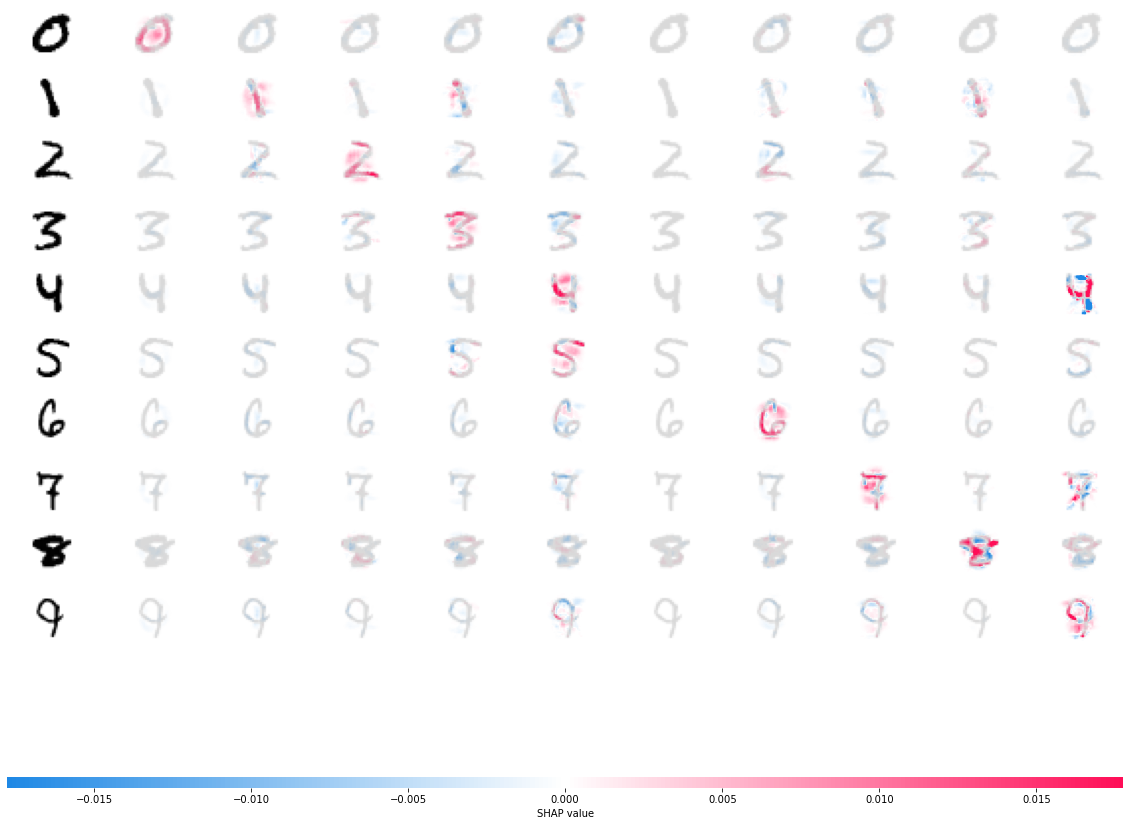

In [6]:
shap_util = SHAPUtil(data.test_dataloader, sim_env.clients[0].net)
shap_util.plot()

In [4]:
sim_env.clients[0].confusion_matrix

tensor([[3.8440e+03, 0.0000e+00, 4.0000e+00, 0.0000e+00, 2.5000e+01, 0.0000e+00,
         2.9000e+01, 7.0000e+00, 1.1000e+01, 9.8000e+02],
        [0.0000e+00, 4.4630e+03, 1.8000e+01, 1.4000e+01, 3.0000e+00, 0.0000e+00,
         1.2000e+01, 1.0000e+00, 2.7000e+01, 1.1370e+03],
        [5.4000e+01, 9.0000e+00, 3.8240e+03, 3.8000e+01, 4.4000e+01, 0.0000e+00,
         4.0000e+01, 7.4000e+01, 4.8000e+01, 1.0290e+03],
        [1.2000e+01, 2.0000e+00, 5.4000e+01, 3.7630e+03, 9.6000e+01, 0.0000e+00,
         1.0000e+00, 5.6000e+01, 4.0000e+01, 1.0260e+03],
        [2.0000e+00, 6.0000e+00, 7.0000e+00, 0.0000e+00, 3.6670e+03, 0.0000e+00,
         6.9000e+01, 3.0000e+00, 1.3000e+01, 1.1430e+03],
        [4.4000e+01, 8.0000e+00, 4.0000e+00, 1.2500e+02, 3.2870e+03, 0.0000e+00,
         3.8000e+01, 1.6000e+01, 4.0000e+01, 8.9800e+02],
        [4.9000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+00, 8.1000e+01, 0.0000e+00,
         3.6690e+03, 0.0000e+00, 1.1000e+01, 9.5800e+02],
        [1.1000e+01, 2.8000

In [5]:
sim_env.clients[0].target_accuracy

tensor([0.7845, 0.7864, 0.7411, 0.7451, 0.7468, 0.0000, 0.7660, 0.7469, 0.6988,
        0.9060])